# 1. Installing and Importing

In [15]:
!pip install seaborn
!pip install matplotlib
!pip install yfinance
!pip install numpy

In [16]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np
import yfinance as yf

#  2. Preparing Data

In [3]:
def create_df(index_name, period=14, start='2003-01-20', end='2023-06-20'):
    data = yf.download(index_name, start=start, end=end)
    data['Price_Change'] = data['Close'].diff()
    data['Price_Change_Percentage'] = data['Price_Change'] / data['Close'].shift(1) * 100
    data['high-low'] = data['High'] - data['Low'] 
    data['high-pc'] = abs(data['High'] - data['Close'].shift(1))
    data['low-pc'] = abs(data['Low'] - data['Close'].shift(1)) 
    TR = data[['high-low', 'high-pc', 'low-pc']].max(axis=1)
    ATR = TR.rolling(period).mean() 
    data['ATR_Change'] = ATR.diff()
    data['ATR_Change_Percentage'] = data['ATR_Change'] / ATR.shift(1) * 100
    result = pd.DataFrame({
        'Index': index_name,
        'Datetime': data.index,
        'Price': data['Close'],
        'Price_Change': data['Price_Change'],
        'Price_Change_Percentage': data['Price_Change_Percentage'],
        'Volume': data['Volume'],
        'ATR': ATR,
        'ATR_Percentage': ATR / data['Close'] * 100,
        'ATR_Change': data['ATR_Change'],
        'ATR_Change_Percentage': data['ATR_Change_Percentage']})
    return result

index_list = [
    ('^GSPC', 'S&P 500 Index (US)'),
    ('^IXIC', 'NASDAQ Composite Index (US)'),
    ('^FTSE', 'FTSE 100 Index (EU)'),
    ('^N225', 'Nikkei 225 Index (JP)'),
    ('^HSI', 'Hang Seng Index (HK)'),
    ('^SET.BK', 'The Stock Exchange of Thailand Index (TH)')]

dataframes_index_list = [create_df(index[0]) for index in index_list]

all_dataframes = pd.concat(dataframes_index_list)
all_dataframes.info()
all_dataframes

[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 30439 entries, 2003-01-21 to 2023-06-19
Data columns (total 10 columns):
 #   Column                   Non-Null Count  Dtype         
---  ------                   --------------  -----         
 0   Index                    30439 non-null  object        
 1   Datetime                 30439 non-null  datetime64[ns]
 2   Price                    30439 non-null  float64       
 3   Price_Change             30433 non-null  float64       
 4   Price_Change_Percentage  30433 non-null  float64       
 5   Volume                   304

,Index,Datetime,Price,Price_Change,Price_Change_Percentage,Volume,ATR,ATR_Percentage,ATR_Change,ATR_Change_Percentage
Date,,,,,,,,,,
2003-01-21,^GSPC,2003-01-21,887.619995,NaN,NaN,1335200000,NaN,NaN,NaN,NaN
2003-01-22,^GSPC,2003-01-22,878.359985,-9.260010,-1.043240,1560800000,NaN,NaN,NaN,NaN
2003-01-23,^GSPC,2003-01-23,887.340027,8.980042,1.022365,1744550000,NaN,NaN,NaN,NaN
2003-01-24,^GSPC,2003-01-24,861.400024,-25.940002,-2.923344,1574800000,NaN,NaN,NaN,NaN
2003-01-27,^GSPC,2003-01-27,847.479980,-13.920044,-1.615979,1435900000,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...
2023-06-13,^SET.BK,2023-06-13,1562.400024,10.989990,0.708387,3365500,13.501430,0.864147,-0.239999,-1.746536
2023-06-14,^SET.BK,2023-06-14,1561.150024,-1.250000,-0.080005,3234200,13.254281,0.849008,-0.247149,-1.830538
2023-06-15,^SET.BK,2023-06-15,1557.709961,-3.440063,-0.220354,3392000,13.195705,0.847122,-0.058576,-0.441943


# 3. Cleaning data

In [4]:
all_dataframes.info()
all_dataframes.isna().sum()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 30439 entries, 2003-01-21 to 2023-06-19
Data columns (total 10 columns):
 #   Column                   Non-Null Count  Dtype         
---  ------                   --------------  -----         
 0   Index                    30439 non-null  object        
 1   Datetime                 30439 non-null  datetime64[ns]
 2   Price                    30439 non-null  float64       
 3   Price_Change             30433 non-null  float64       
 4   Price_Change_Percentage  30433 non-null  float64       
 5   Volume                   30439 non-null  int64         
 6   ATR                      30361 non-null  float64       
 7   ATR_Percentage           30361 non-null  float64       
 8   ATR_Change               30355 non-null  float64       
 9   ATR_Change_Percentage    30355 non-null  float64       
dtypes: datetime64[ns](1), float64(7), int64(1), object(1)
memory usage: 2.6+ MB


Index                       0
Datetime                    0
Price                       0
Price_Change                6
Price_Change_Percentage     6
Volume                      0
ATR                        78
ATR_Percentage             78
ATR_Change                 84
ATR_Change_Percentage      84
dtype: int64

In [5]:
all_dataframes = all_dataframes.sort_values(by='Datetime', ascending=True)
all_dataframes = all_dataframes.dropna()
all_dataframes.info()
all_dataframes.isna().sum()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 30355 entries, 2003-02-07 to 2023-06-19
Data columns (total 10 columns):
 #   Column                   Non-Null Count  Dtype         
---  ------                   --------------  -----         
 0   Index                    30355 non-null  object        
 1   Datetime                 30355 non-null  datetime64[ns]
 2   Price                    30355 non-null  float64       
 3   Price_Change             30355 non-null  float64       
 4   Price_Change_Percentage  30355 non-null  float64       
 5   Volume                   30355 non-null  int64         
 6   ATR                      30355 non-null  float64       
 7   ATR_Percentage           30355 non-null  float64       
 8   ATR_Change               30355 non-null  float64       
 9   ATR_Change_Percentage    30355 non-null  float64       
dtypes: datetime64[ns](1), float64(7), int64(1), object(1)
memory usage: 2.5+ MB


Index                      0
Datetime                   0
Price                      0
Price_Change               0
Price_Change_Percentage    0
Volume                     0
ATR                        0
ATR_Percentage             0
ATR_Change                 0
ATR_Change_Percentage      0
dtype: int64

In [6]:
all_dataframes

,Index,Datetime,Price,Price_Change,Price_Change_Percentage,Volume,ATR,ATR_Percentage,ATR_Change,ATR_Change_Percentage
Date,,,,,,,,,,
2003-02-07,^SET.BK,2003-02-07,378.950012,-0.149994,-0.039566,1335300,4.389995,1.158463,-0.113573,-2.521852
2003-02-07,^FTSE,2003-02-07,3599.199951,2.199951,0.061161,1534147000,98.314279,2.731559,-0.614258,-0.620911
2003-02-07,^N225,2003-02-07,8448.160156,-36.030273,-0.424675,38300000,152.732910,1.807884,-4.857840,-3.082567
2003-02-10,^SET.BK,2003-02-10,375.480011,-3.470001,-0.915688,1130900,4.351423,1.158896,-0.038572,-0.878635
2003-02-10,^IXIC,2003-02-10,1296.680054,14.210083,1.108025,1216440000,30.770735,2.373040,0.065717,0.214028
...,...,...,...,...,...,...,...,...,...,...
2023-06-16,^GSPC,2023-06-16,4409.589844,-16.250000,-0.367162,6848600000,44.202148,1.002410,-1.468576,-3.215573
2023-06-19,^HSI,2023-06-19,19912.890625,-127.478516,-0.636109,1906054300,346.229353,1.738720,1.797015,0.521732
2023-06-19,^FTSE,2023-06-19,7588.500000,-54.200195,-0.709176,439722500,63.235805,0.833311,-3.621408,-5.416630


In [7]:
for i in range(len(dataframes_index_list)):
  print(dataframes_index_list[i].isna().sum())

Index                       0
Datetime                    0
Price                       0
Price_Change                1
Price_Change_Percentage     1
Volume                      0
ATR                        13
ATR_Percentage             13
ATR_Change                 14
ATR_Change_Percentage      14
dtype: int64
Index                       0
Datetime                    0
Price                       0
Price_Change                1
Price_Change_Percentage     1
Volume                      0
ATR                        13
ATR_Percentage             13
ATR_Change                 14
ATR_Change_Percentage      14
dtype: int64
Index                       0
Datetime                    0
Price                       0
Price_Change                1
Price_Change_Percentage     1
Volume                      0
ATR                        13
ATR_Percentage             13
ATR_Change                 14
ATR_Change_Percentage      14
dtype: int64
Index                       0
Datetime                    0
P

In [8]:
for i in range(len(dataframes_index_list)):
  dataframes_index_list[i].dropna(inplace=True)
  print(index_list[i])
  print(dataframes_index_list[i].isna().sum())
  print(dataframes_index_list[i].info())

('^GSPC', 'S&P 500 Index (US)')
Index                      0
Datetime                   0
Price                      0
Price_Change               0
Price_Change_Percentage    0
Volume                     0
ATR                        0
ATR_Percentage             0
ATR_Change                 0
ATR_Change_Percentage      0
dtype: int64
<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 5124 entries, 2003-02-10 to 2023-06-16
Data columns (total 10 columns):
 #   Column                   Non-Null Count  Dtype         
---  ------                   --------------  -----         
 0   Index                    5124 non-null   object        
 1   Datetime                 5124 non-null   datetime64[ns]
 2   Price                    5124 non-null   float64       
 3   Price_Change             5124 non-null   float64       
 4   Price_Change_Percentage  5124 non-null   float64       
 5   Volume                   5124 non-null   int64         
 6   ATR                      5124 non-null   float6

# Data Visualization 1: Corelation Heatmap

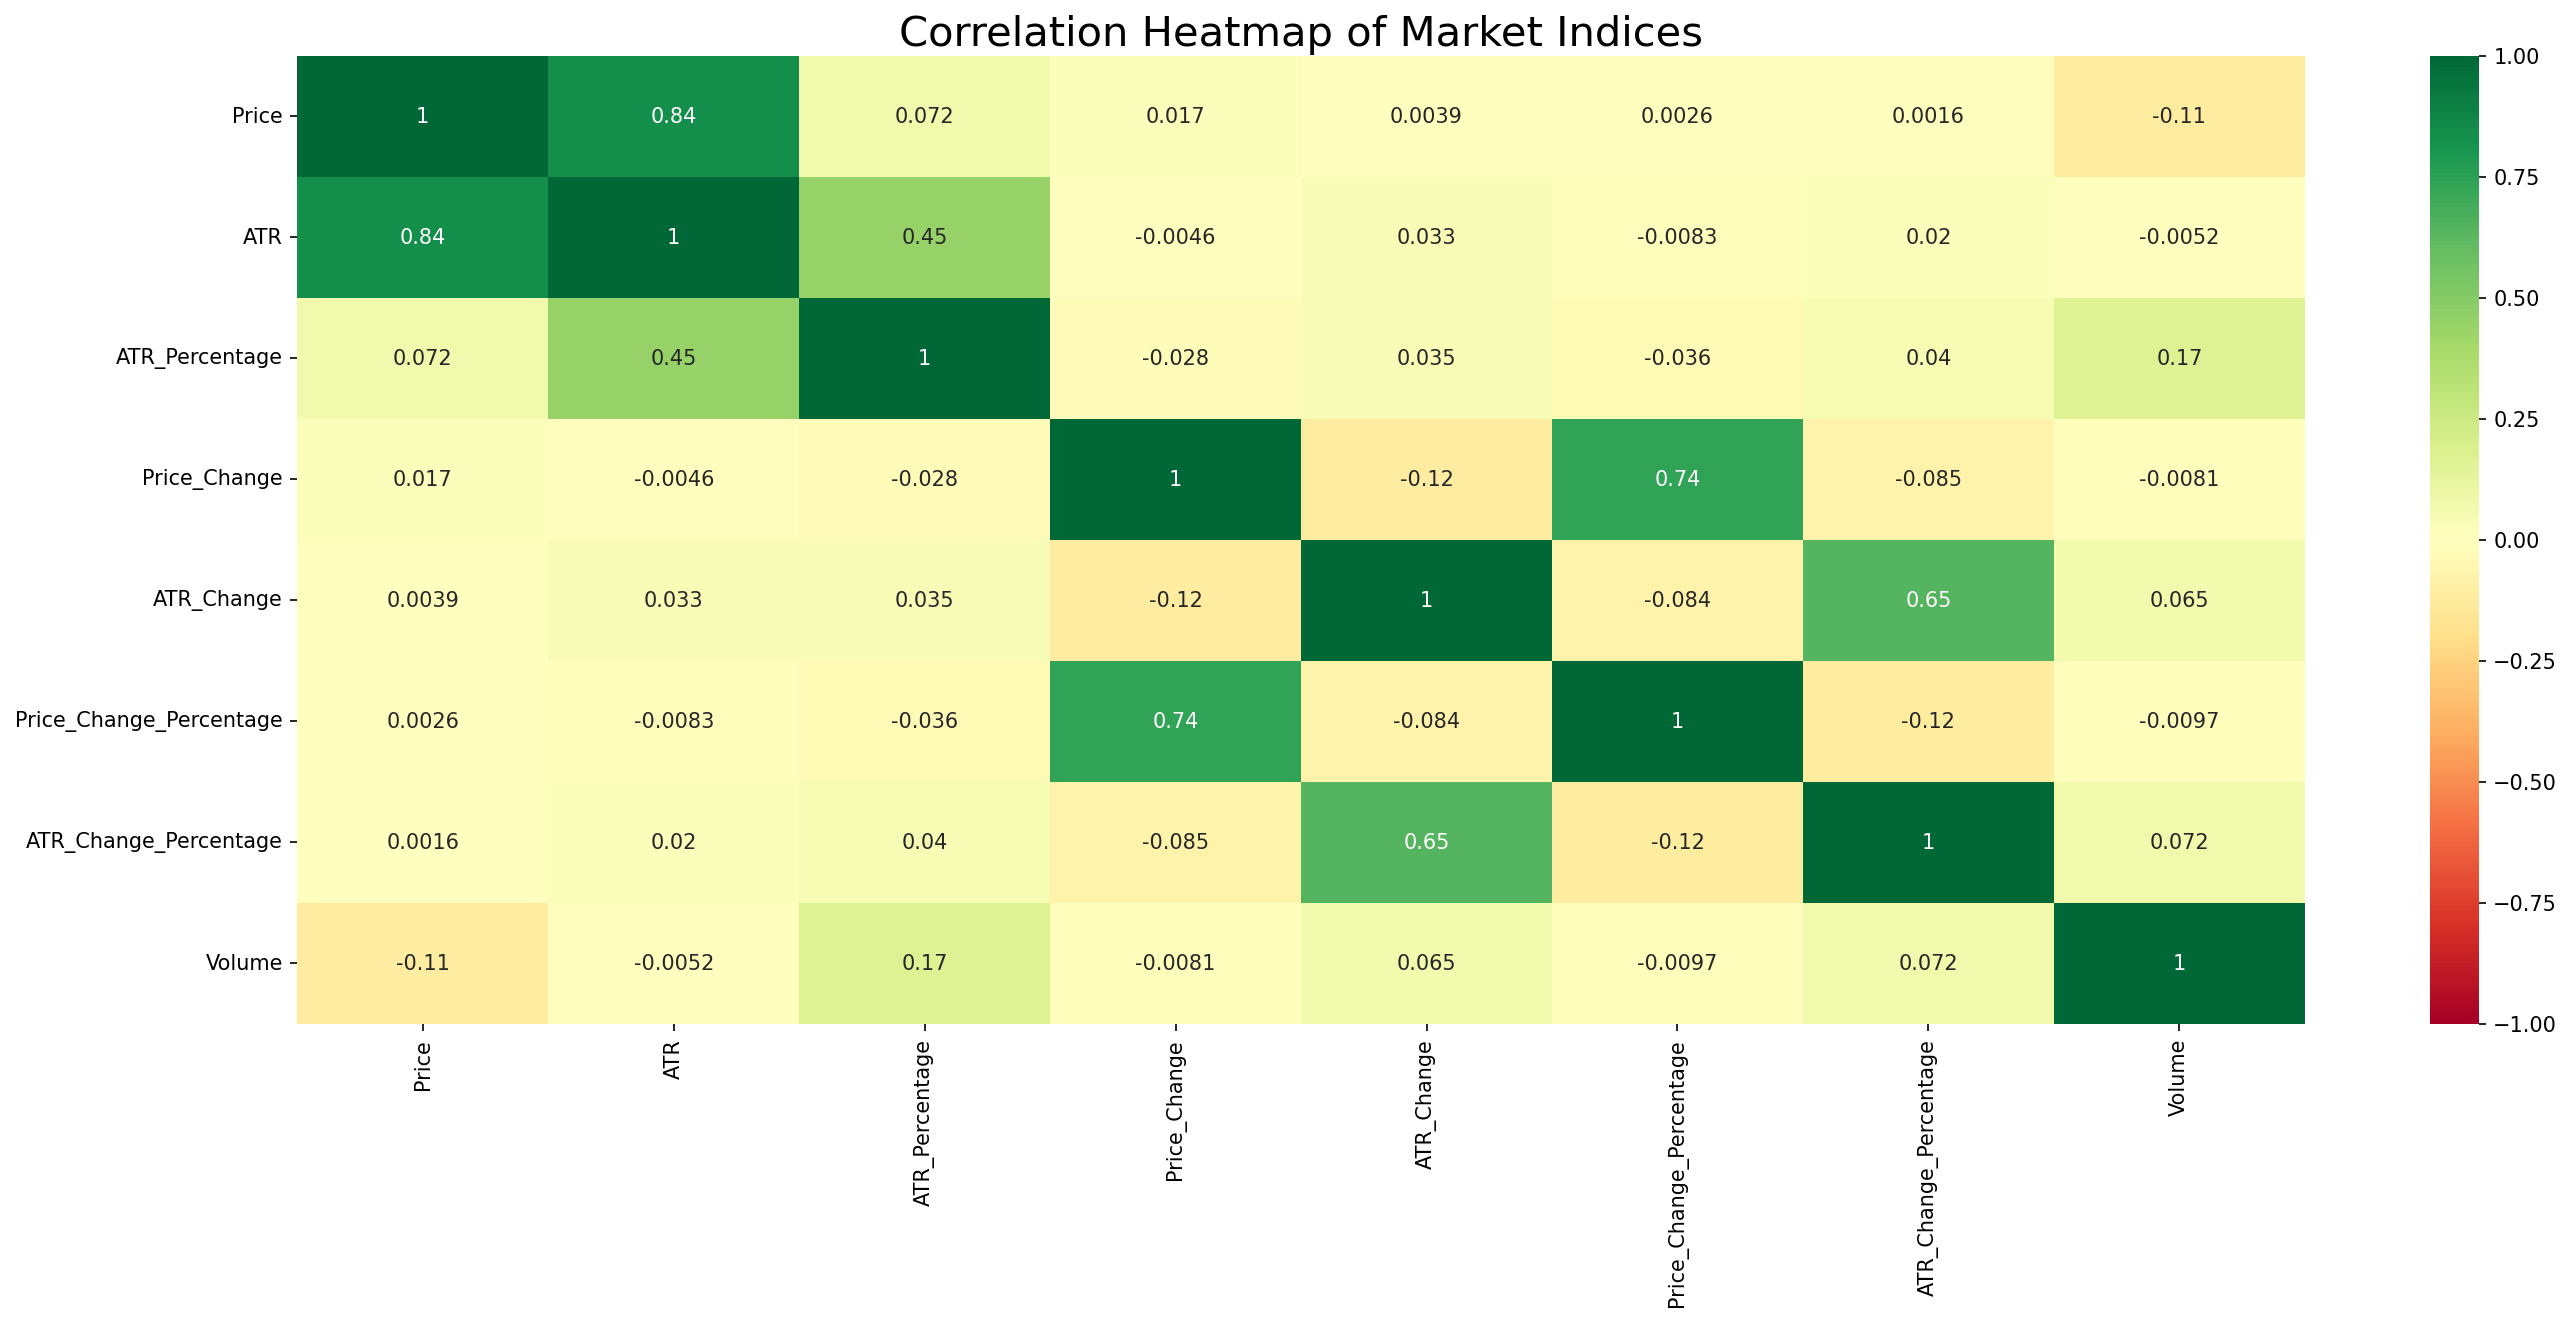

In [17]:
correlation_matrix = all_dataframes.corr()

price_corr = correlation_matrix['Price'].sort_values(ascending=False)
sorted_corr_matrix = correlation_matrix.loc[price_corr.index, price_corr.index]

plt.figure(figsize=(20, 10), dpi=150)
sns.heatmap(sorted_corr_matrix, annot=True, cmap='RdYlGn', vmin=-1, vmax=1)

title = 'Correlation Heatmap of Market Indices'
plt.title(title, size=20, pad=5)

plt.tight_layout(pad=5.0)

plt.show()


# Data visualization 2 : Line plot

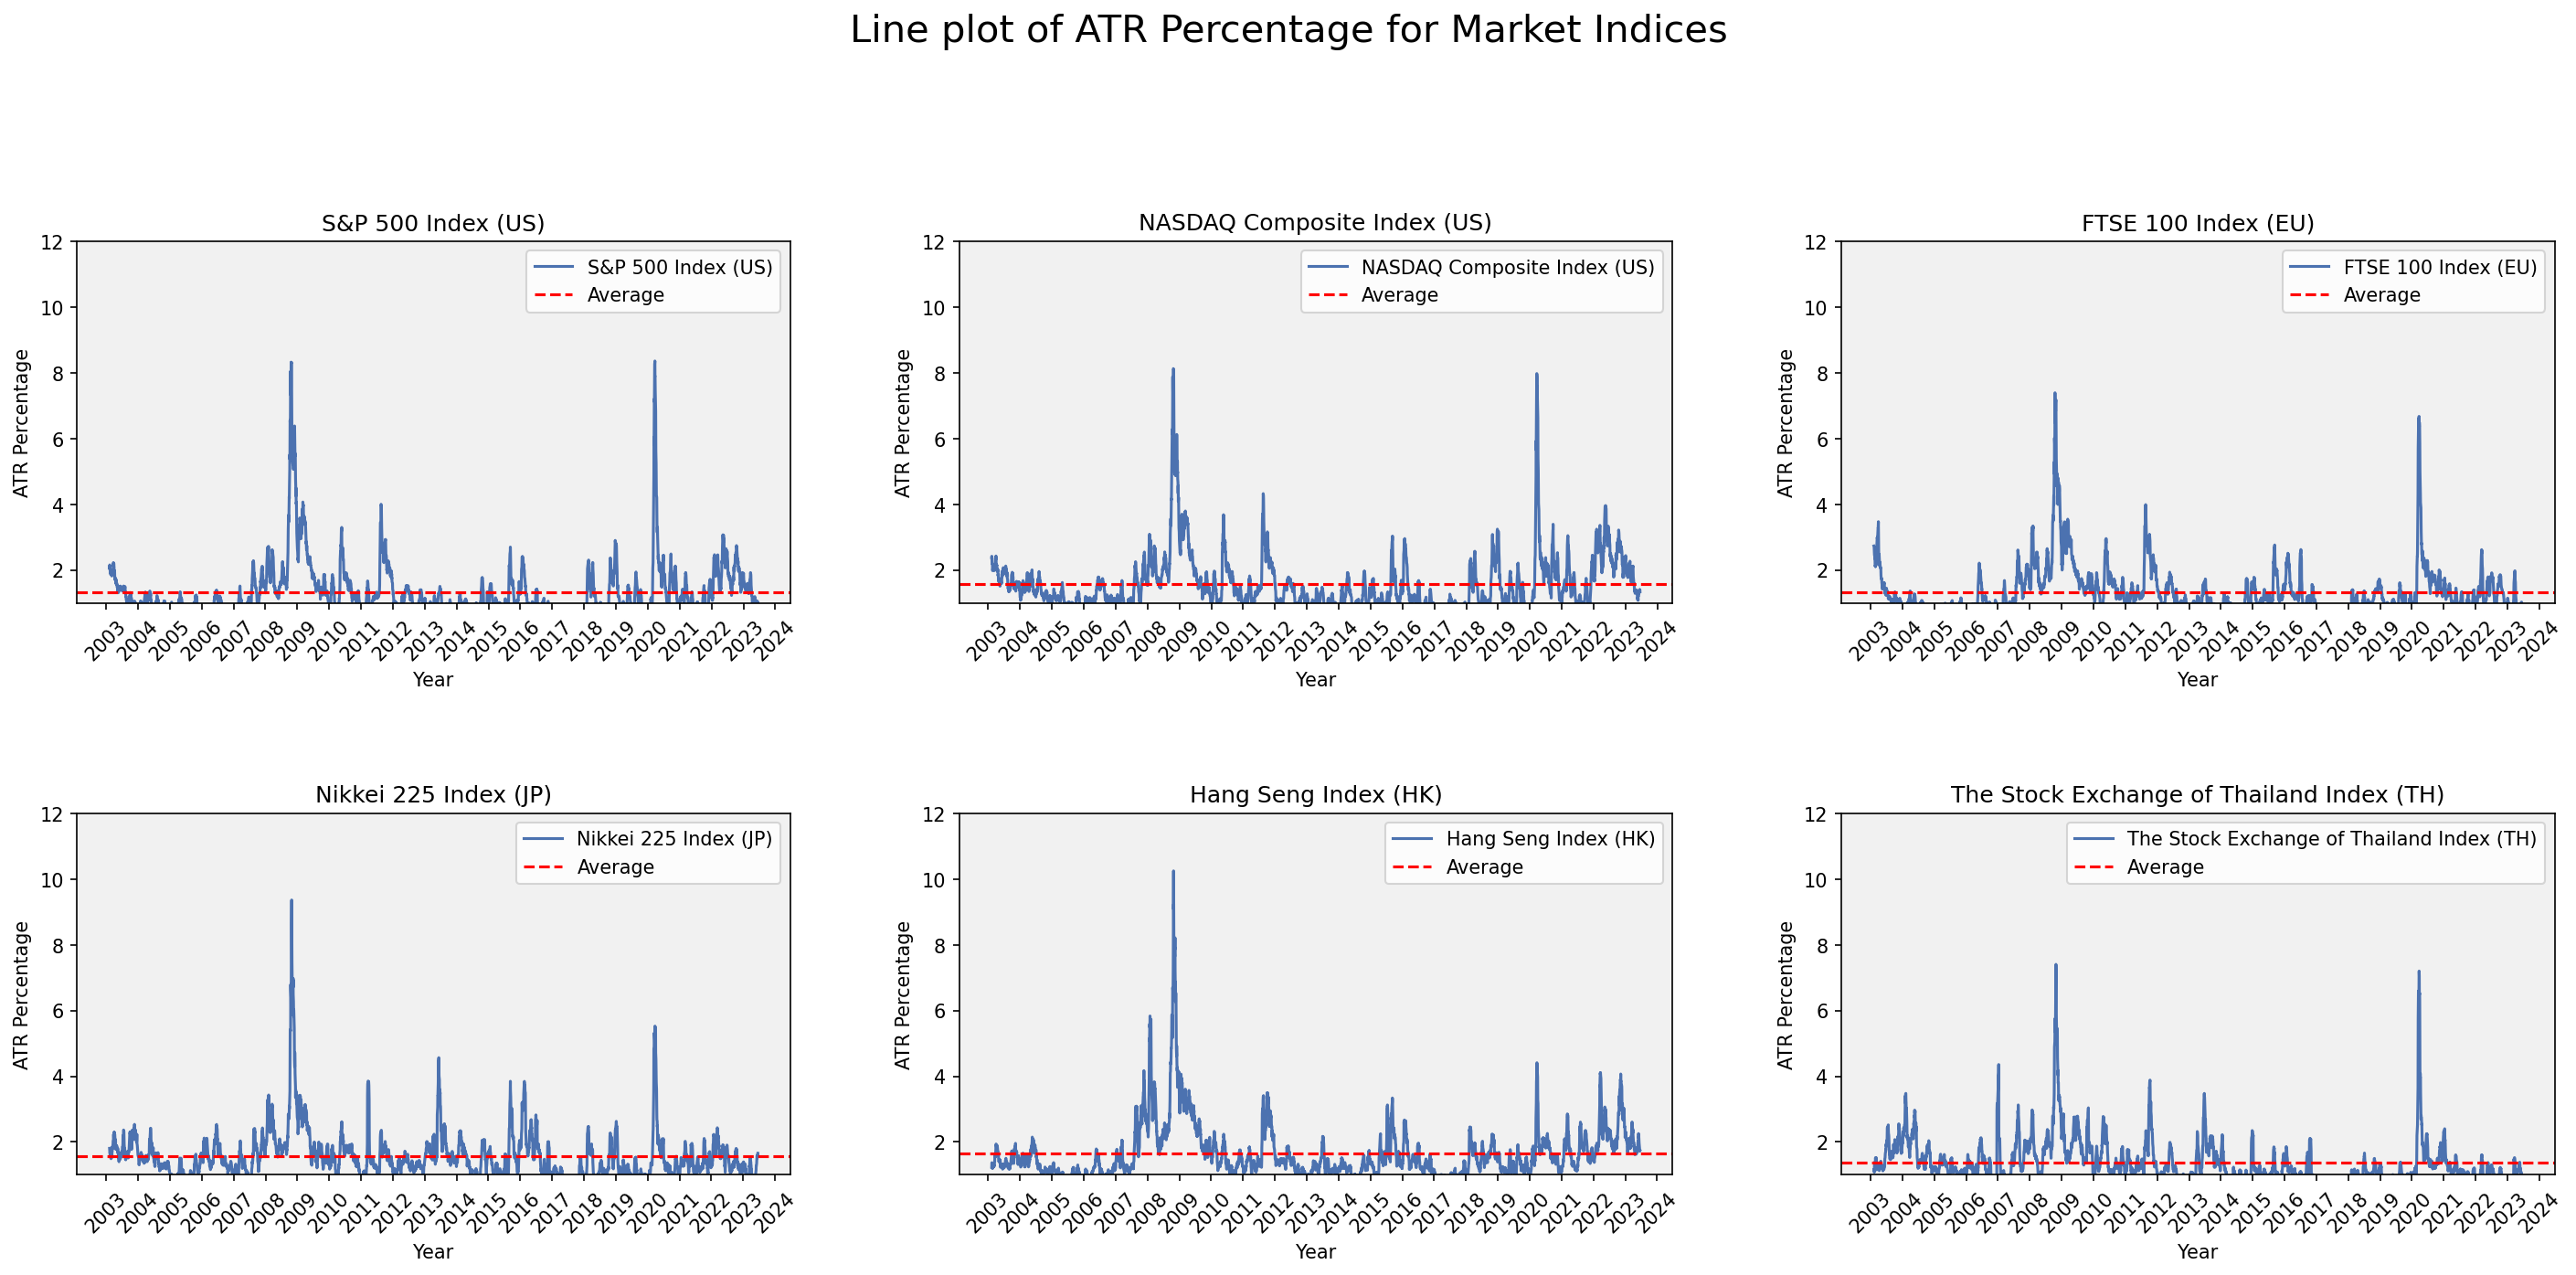

In [27]:
import matplotlib.dates as mdates
from matplotlib.ticker import MaxNLocator
fig, axes = plt.subplots(nrows=2, ncols=3, figsize=(20, 10), dpi=150)
y_min = 1
y_max = 12

for i, (index, name) in enumerate(index_list):
    ax = axes[i // 3, i % 3]
    index_data = all_dataframes[all_dataframes['Index'] == index]
    ax.plot(index_data['Datetime'], index_data['ATR_Percentage'], label=name)
    average_atr_percentage = np.mean(index_data['ATR_Percentage'])
    ax.axhline(average_atr_percentage, color='red', linestyle='--', label='Average')
    ax.set_ylim(y_min, y_max)
    ax.yaxis.set_major_locator(MaxNLocator(integer=True))
    ax.set_title(name)
    ax.set_xlabel('Year')
    ax.set_ylabel('ATR Percentage')
    years = mdates.YearLocator()
    ax.xaxis.set_major_locator(years)
    ax.xaxis.set_major_formatter(mdates.DateFormatter('%Y'))
    plt.setp(ax.get_xticklabels(), rotation=45)
    ax.legend()
    ax.patch.set_alpha(0.3)
    ax.set_facecolor('lightgray')
fig.suptitle('Line plot of ATR Percentage for Market Indices', size =20)
fig.tight_layout(pad=5.0)
plt.show()


# Data visualization 3 : Line plot

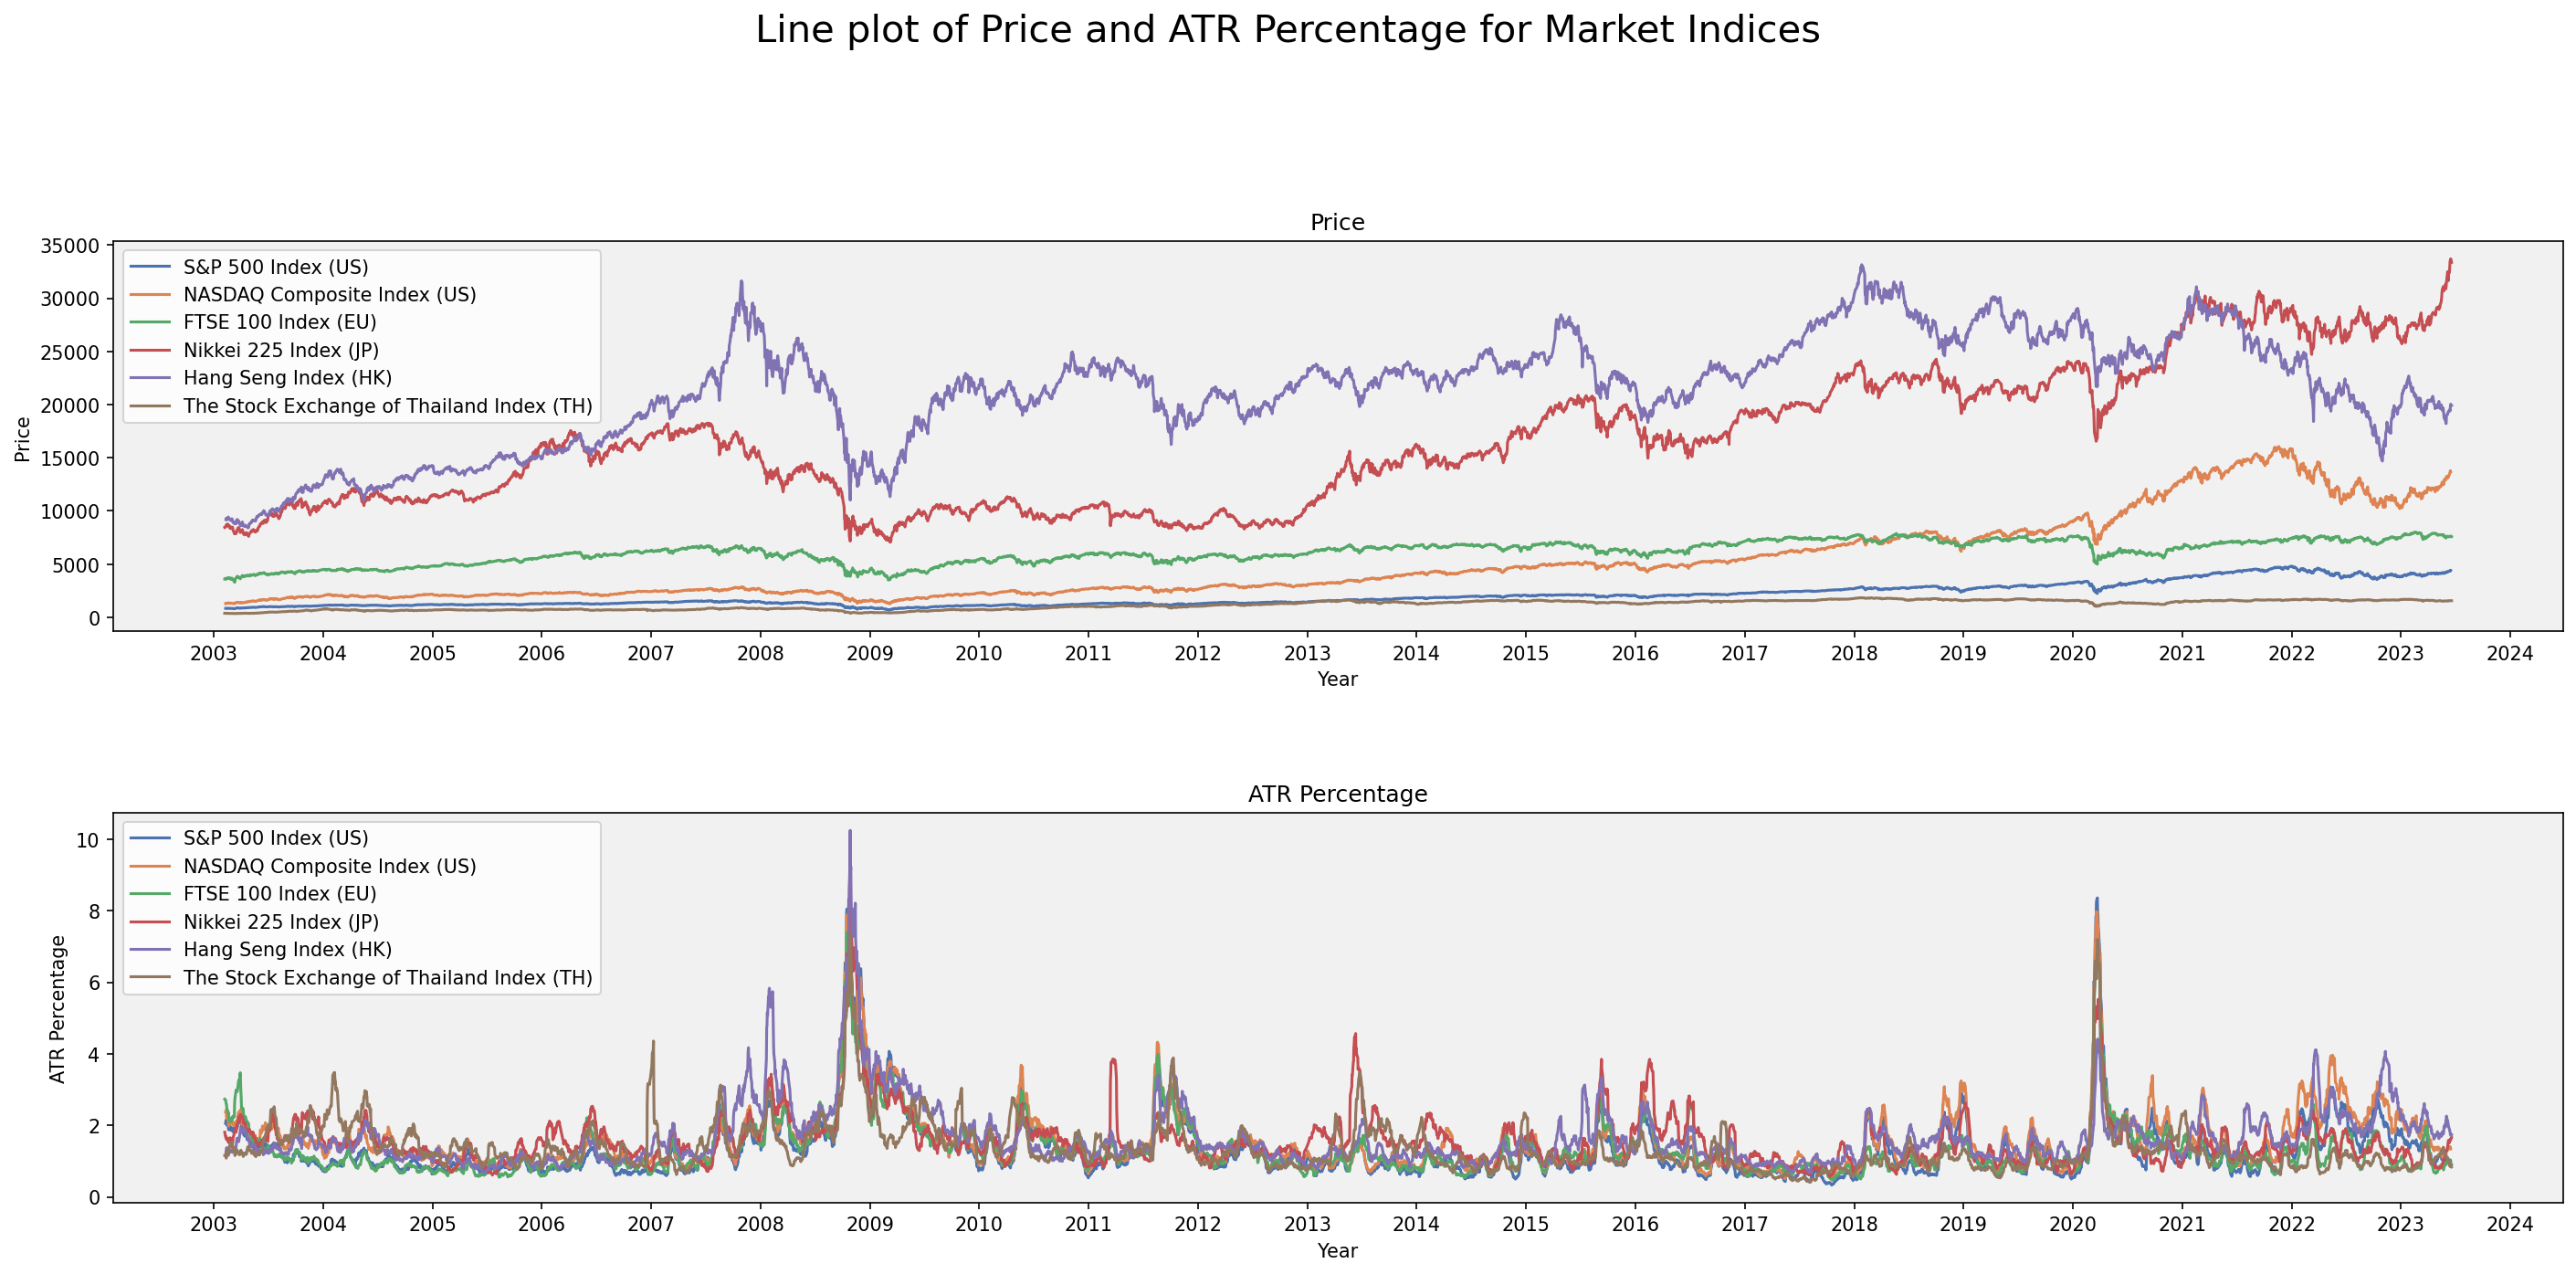

In [29]:
import matplotlib.dates as mdates

fig, (ax1, ax2) = plt.subplots(2, 1, figsize=(20, 10), dpi=150)

for i, (index_name, index_description) in enumerate(index_list):
    index_data = all_dataframes[all_dataframes['Index'] == index_name]
    ax1.plot(index_data['Datetime'], index_data['Price'], label=index_description, color=f'C{i}')
    ax2.plot(index_data['Datetime'], index_data['ATR_Percentage'], label=index_description, color=f'C{i}')
    
ax1.set_title('Price')
ax1.set_xlabel('Year')
ax1.set_ylabel('Price')
ax1.legend()

ax2.set_title('ATR Percentage')
ax2.set_xlabel('Year')
ax2.set_ylabel('ATR Percentage')
ax2.legend()

years = mdates.YearLocator()
ax1.xaxis.set_major_locator(years)
ax2.xaxis.set_major_locator(years)

date_fmt = mdates.DateFormatter('%Y')
ax1.xaxis.set_major_formatter(date_fmt)
ax2.xaxis.set_major_formatter(date_fmt)

ax1.patch.set_alpha(0.3)
ax1.set_facecolor('lightgray')

ax2.patch.set_alpha(0.3)
ax2.set_facecolor('lightgray')

plt.suptitle('Line plot of Price and ATR Percentage for Market Indices', size =20)

fig.tight_layout(pad=5.0)

plt.show()


# Data visualization 4 : Distribution and Histogram

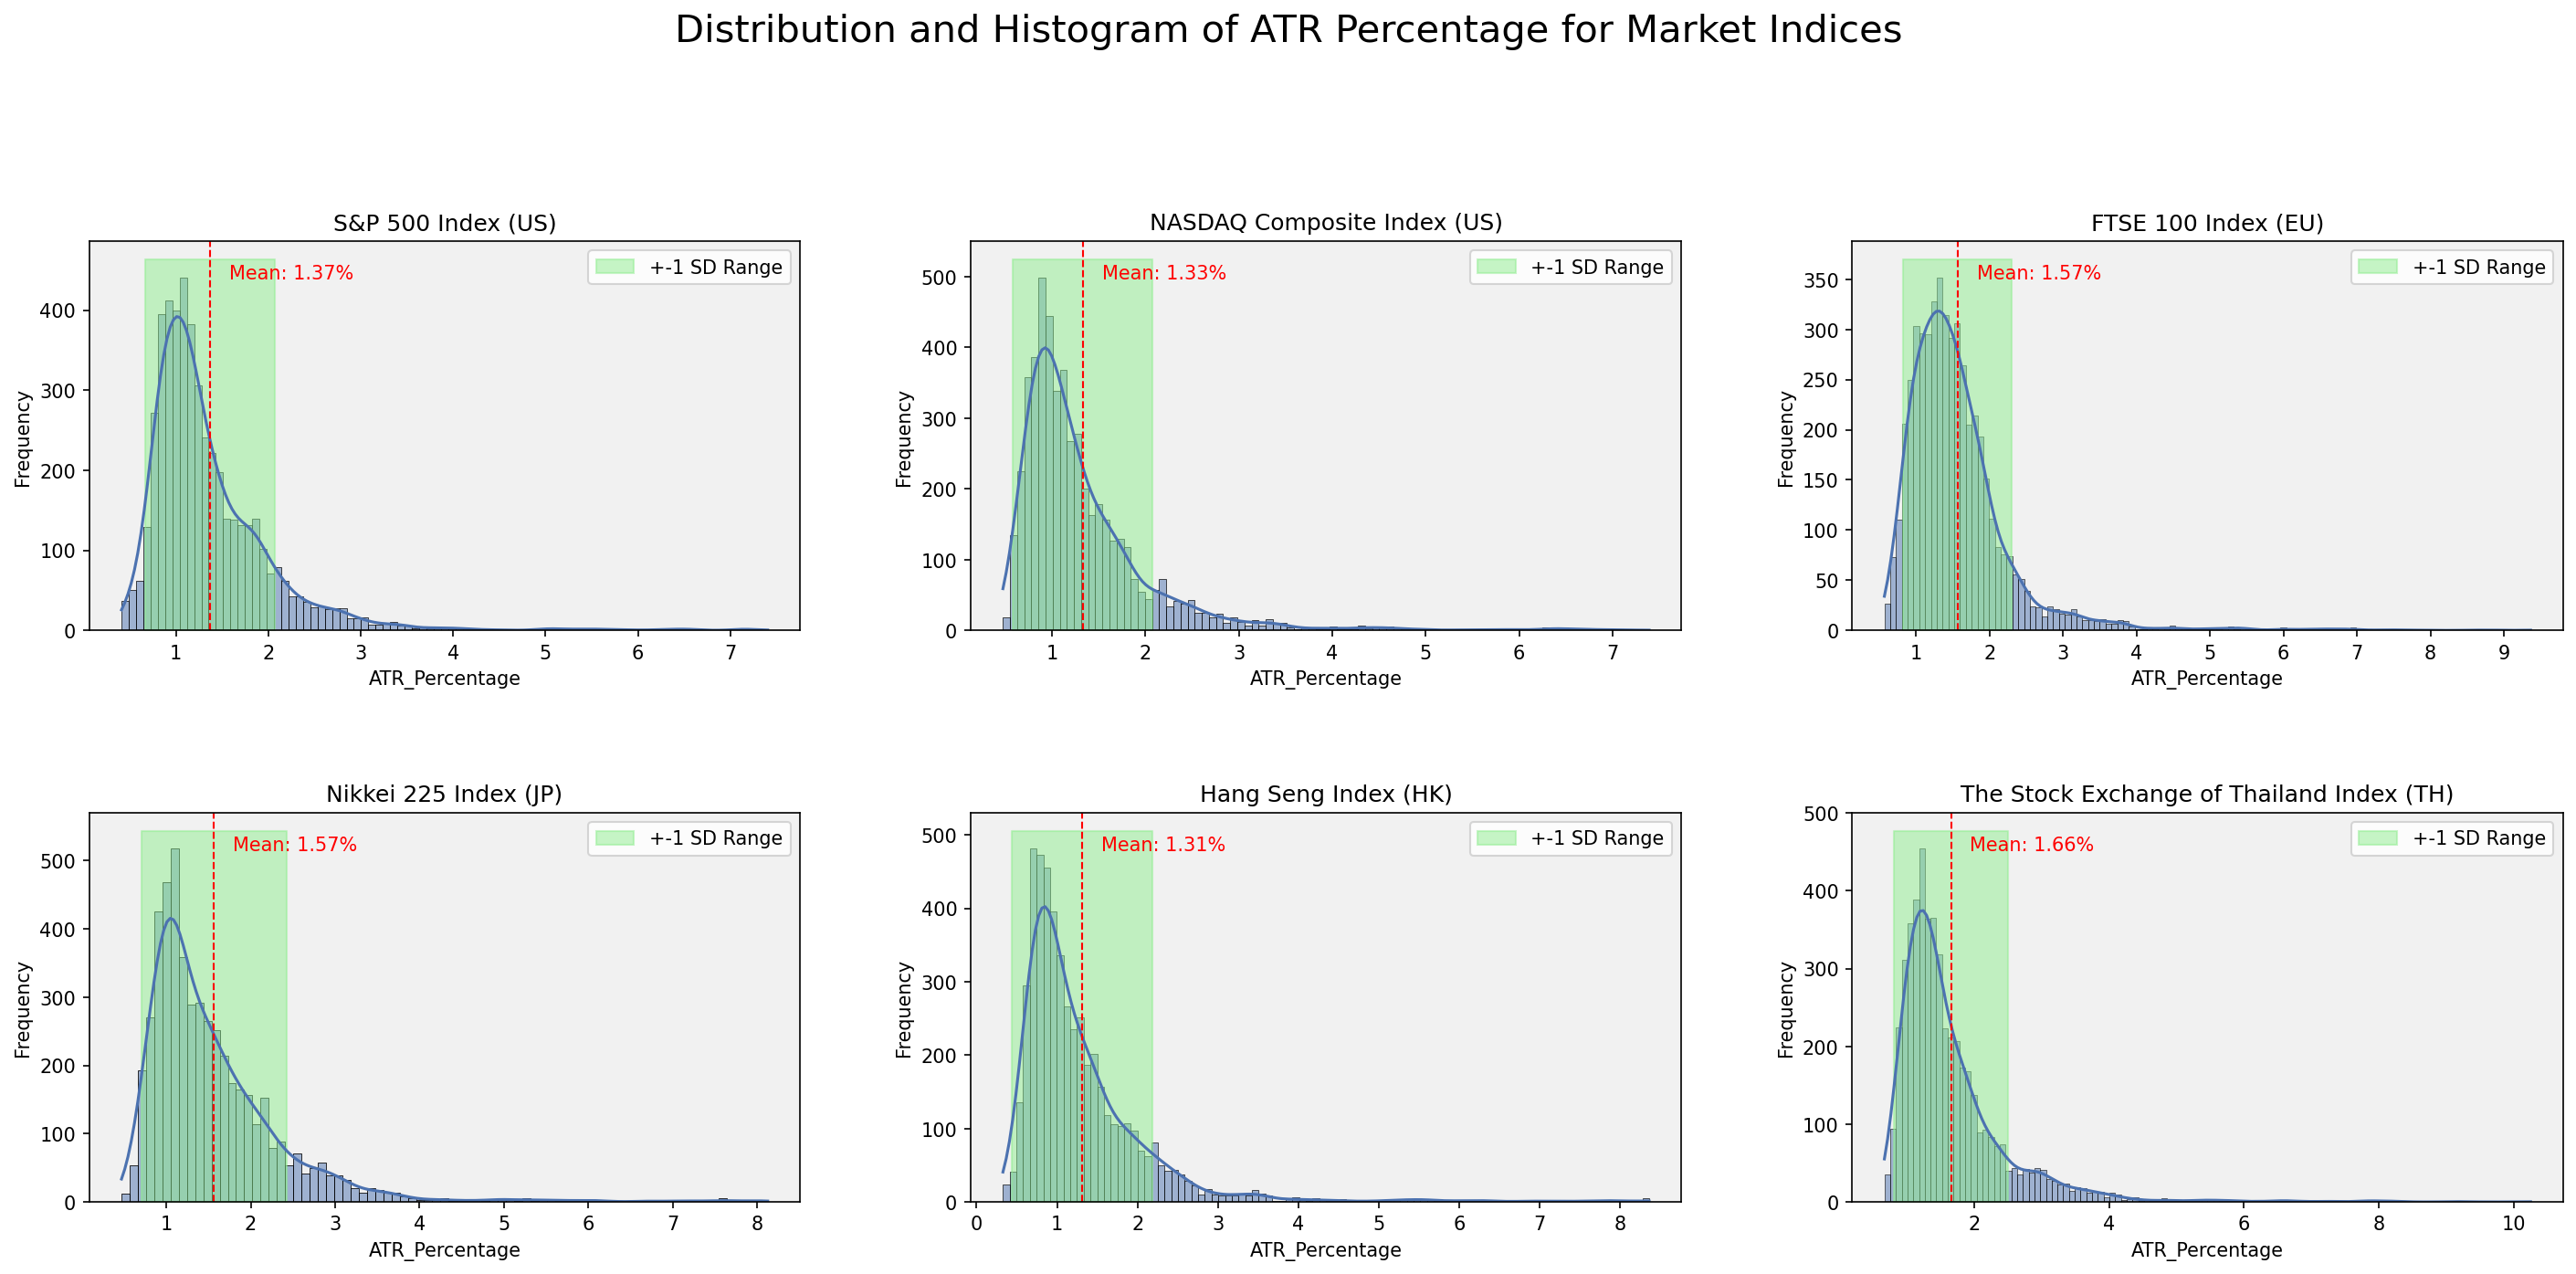

In [30]:
fig, axs = plt.subplots(2, 3, figsize=(20, 10), dpi=150)

for i, (index_name, ax) in enumerate(zip(all_dataframes['Index'].unique(), axs.flatten())):
    index_data = all_dataframes[all_dataframes['Index'] == index_name]
    
    sns.histplot(data=index_data, x='ATR_Percentage', kde=True, ax=ax, alpha=0.5)
    ax.set_title(index_list[i][1])
    ax.set_xlabel('ATR_Percentage')
    ax.set_ylabel('Frequency')

    ax.locator_params(nbins=10, axis='x')

    mean_value = index_data['ATR_Percentage'].mean()
    ax.axvline(mean_value, color='red', linestyle='--', linewidth=1)
    ax.annotate(f'Mean: {mean_value:.2f}%', xy=(mean_value, ax.get_ylim()[1]), xytext=(10, -10),
                textcoords='offset points', color='red')

    std_value = index_data['ATR_Percentage'].std()
    ax.fill_betweenx(ax.get_ylim(), mean_value - std_value, mean_value + std_value, color='lightgreen', alpha=0.5, label='+-1 SD Range')

    ax.legend(loc='upper right')

    ax.patch.set_alpha(0.3)
    ax.set_facecolor('lightgray')

fig.suptitle('Distribution and Histogram of ATR Percentage for Market Indices', size =20)

fig.tight_layout(pad=5.0)

plt.show()

# Data visualization 5 : Pie Chart

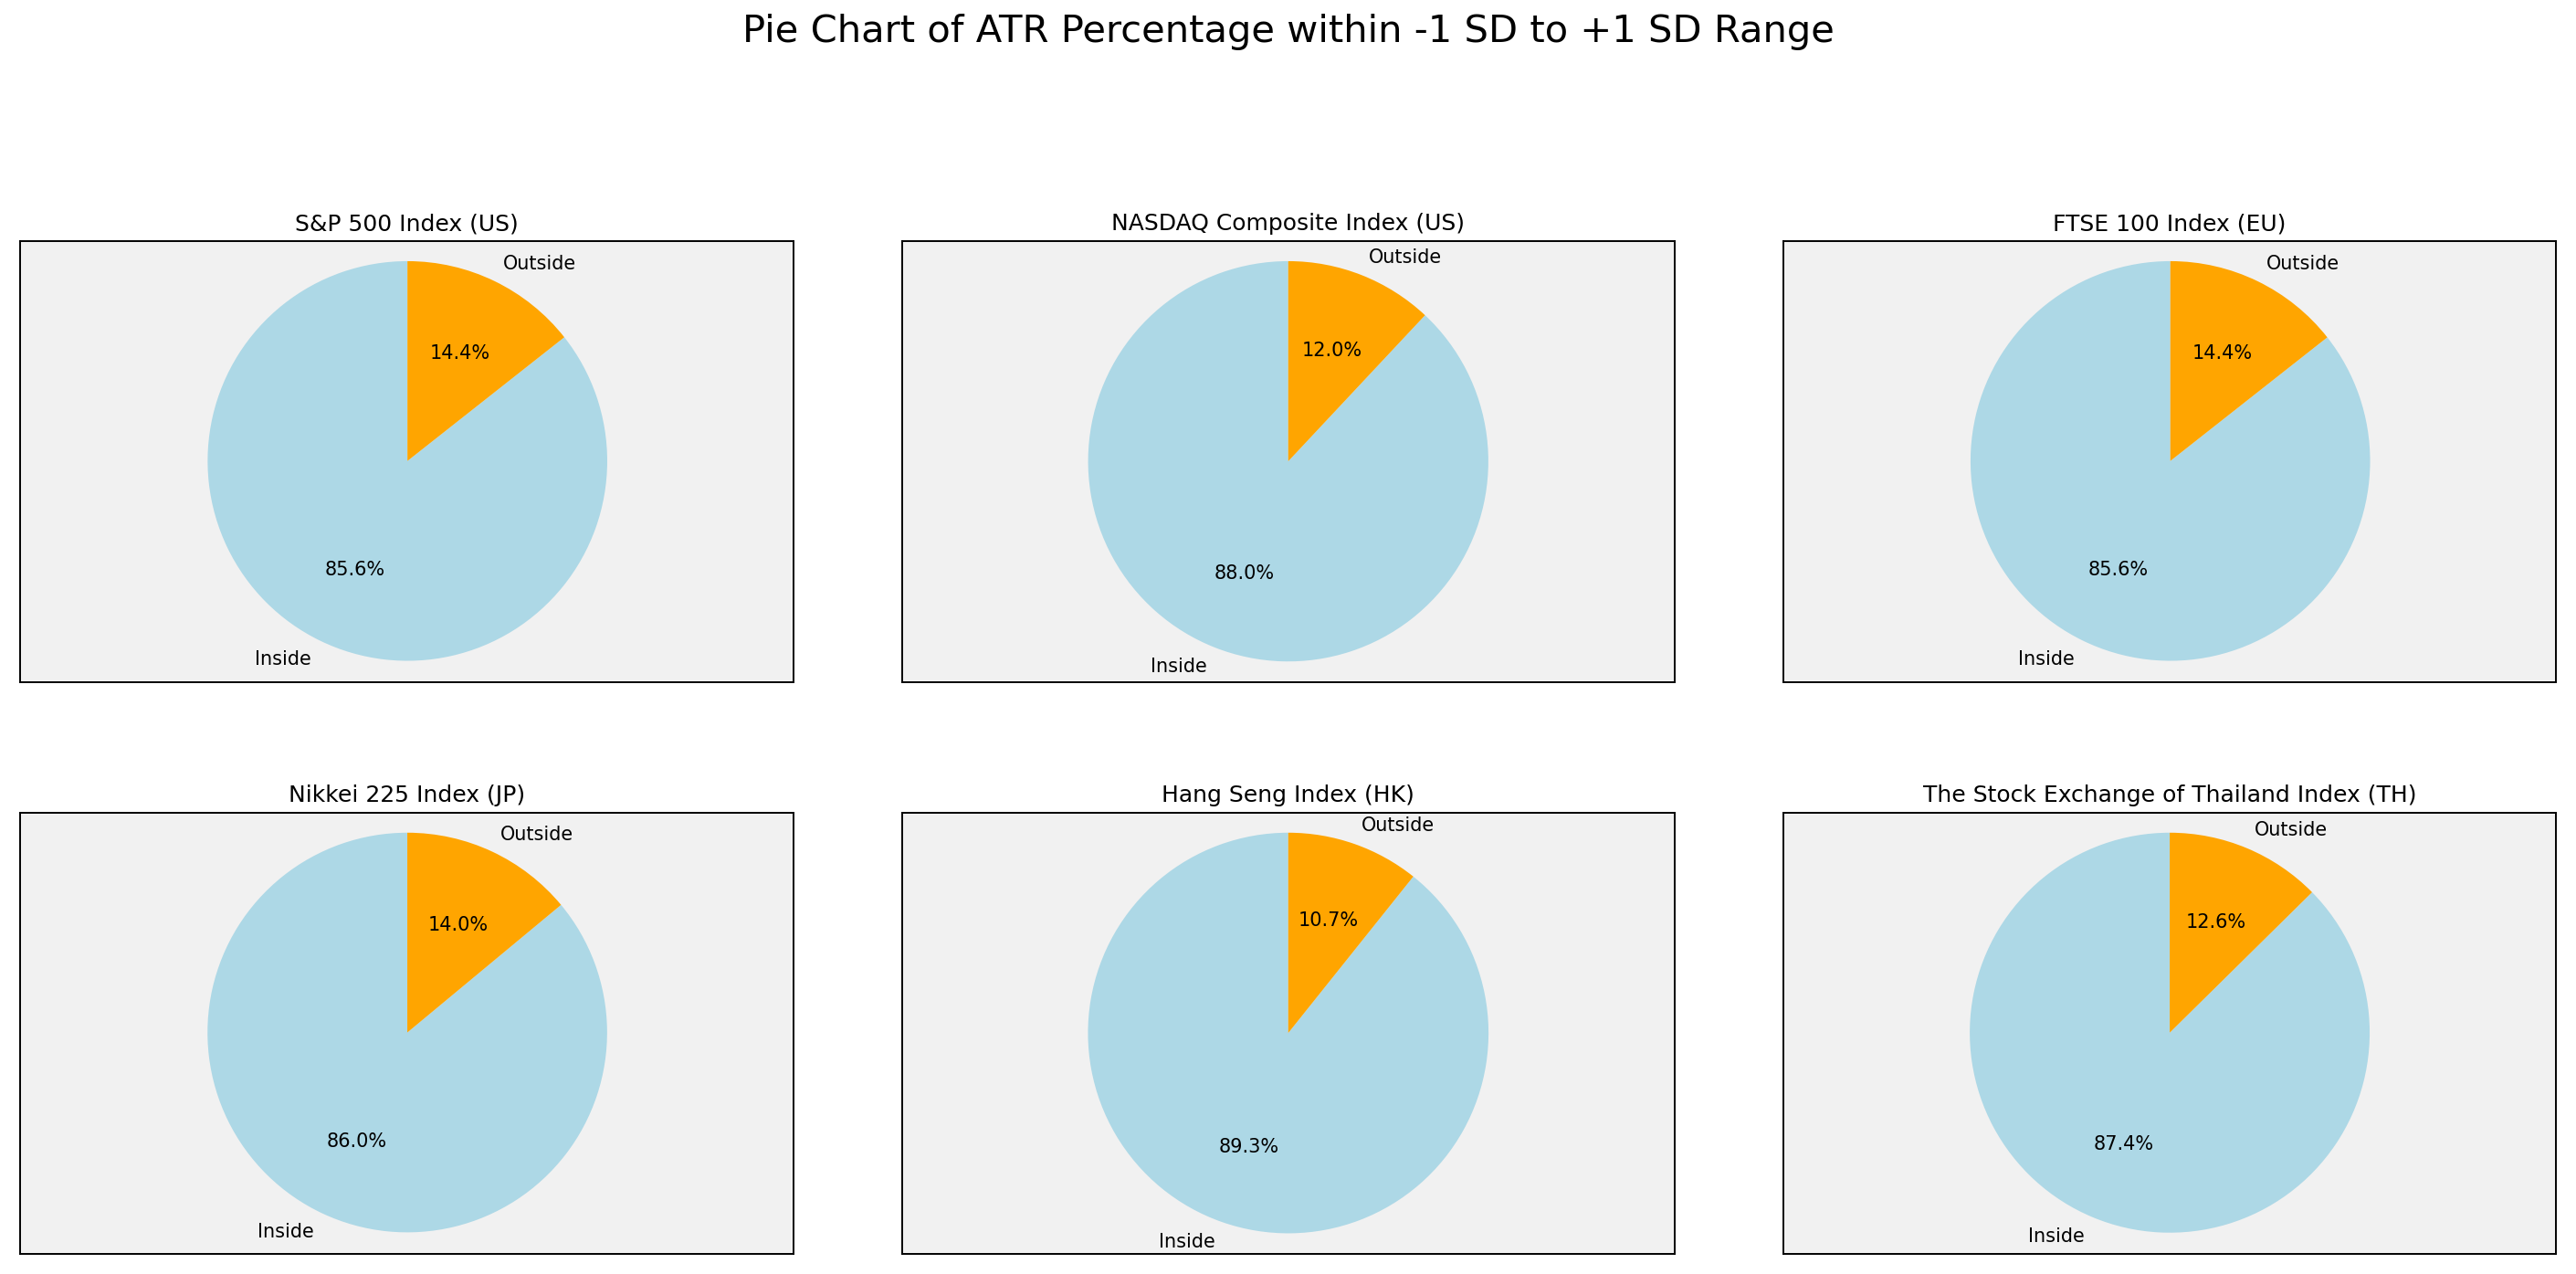

In [22]:
fig, axs = plt.subplots(2, 3, figsize=(20, 10), dpi=150)

for i, (index_name, ax) in enumerate(zip(all_dataframes['Index'].unique(), axs.flatten())):
    index_data = all_dataframes[all_dataframes['Index'] == index_name]

    mean_value = index_data['ATR_Percentage'].mean()
    std_value = index_data['ATR_Percentage'].std()

    filtered_data = index_data[
        np.logical_and(
            index_data['ATR_Percentage'] >= mean_value - std_value,
            index_data['ATR_Percentage'] <= mean_value + std_value
        )
    ]

    count = len(filtered_data)
    total_count = len(index_data)
    percent = (count / total_count) * 100
    non_percent = 100 - percent

    pie_labels = ['Inside', 'Outside']
    pie_values = [percent, non_percent]
    ax2 = ax.twinx().twiny()
    ax2.pie(pie_values, labels=pie_labels, autopct='%1.1f%%', colors=['lightblue', 'orange'], startangle=90)
    ax2.axis('equal')
    ax2.set_title(index_list[i][1])

    ax.set_facecolor('lightblue')

    ax.set_xticks([])
    ax.set_yticks([])

    ax.patch.set_alpha(0.3)
    ax.set_facecolor('lightgray')

fig.suptitle('Pie Chart of ATR Percentage within -1 SD to +1 SD Range', size=20)

fig.tight_layout(pad=5.0)

plt.show()


# Data visualization 6 : Scatter Plot

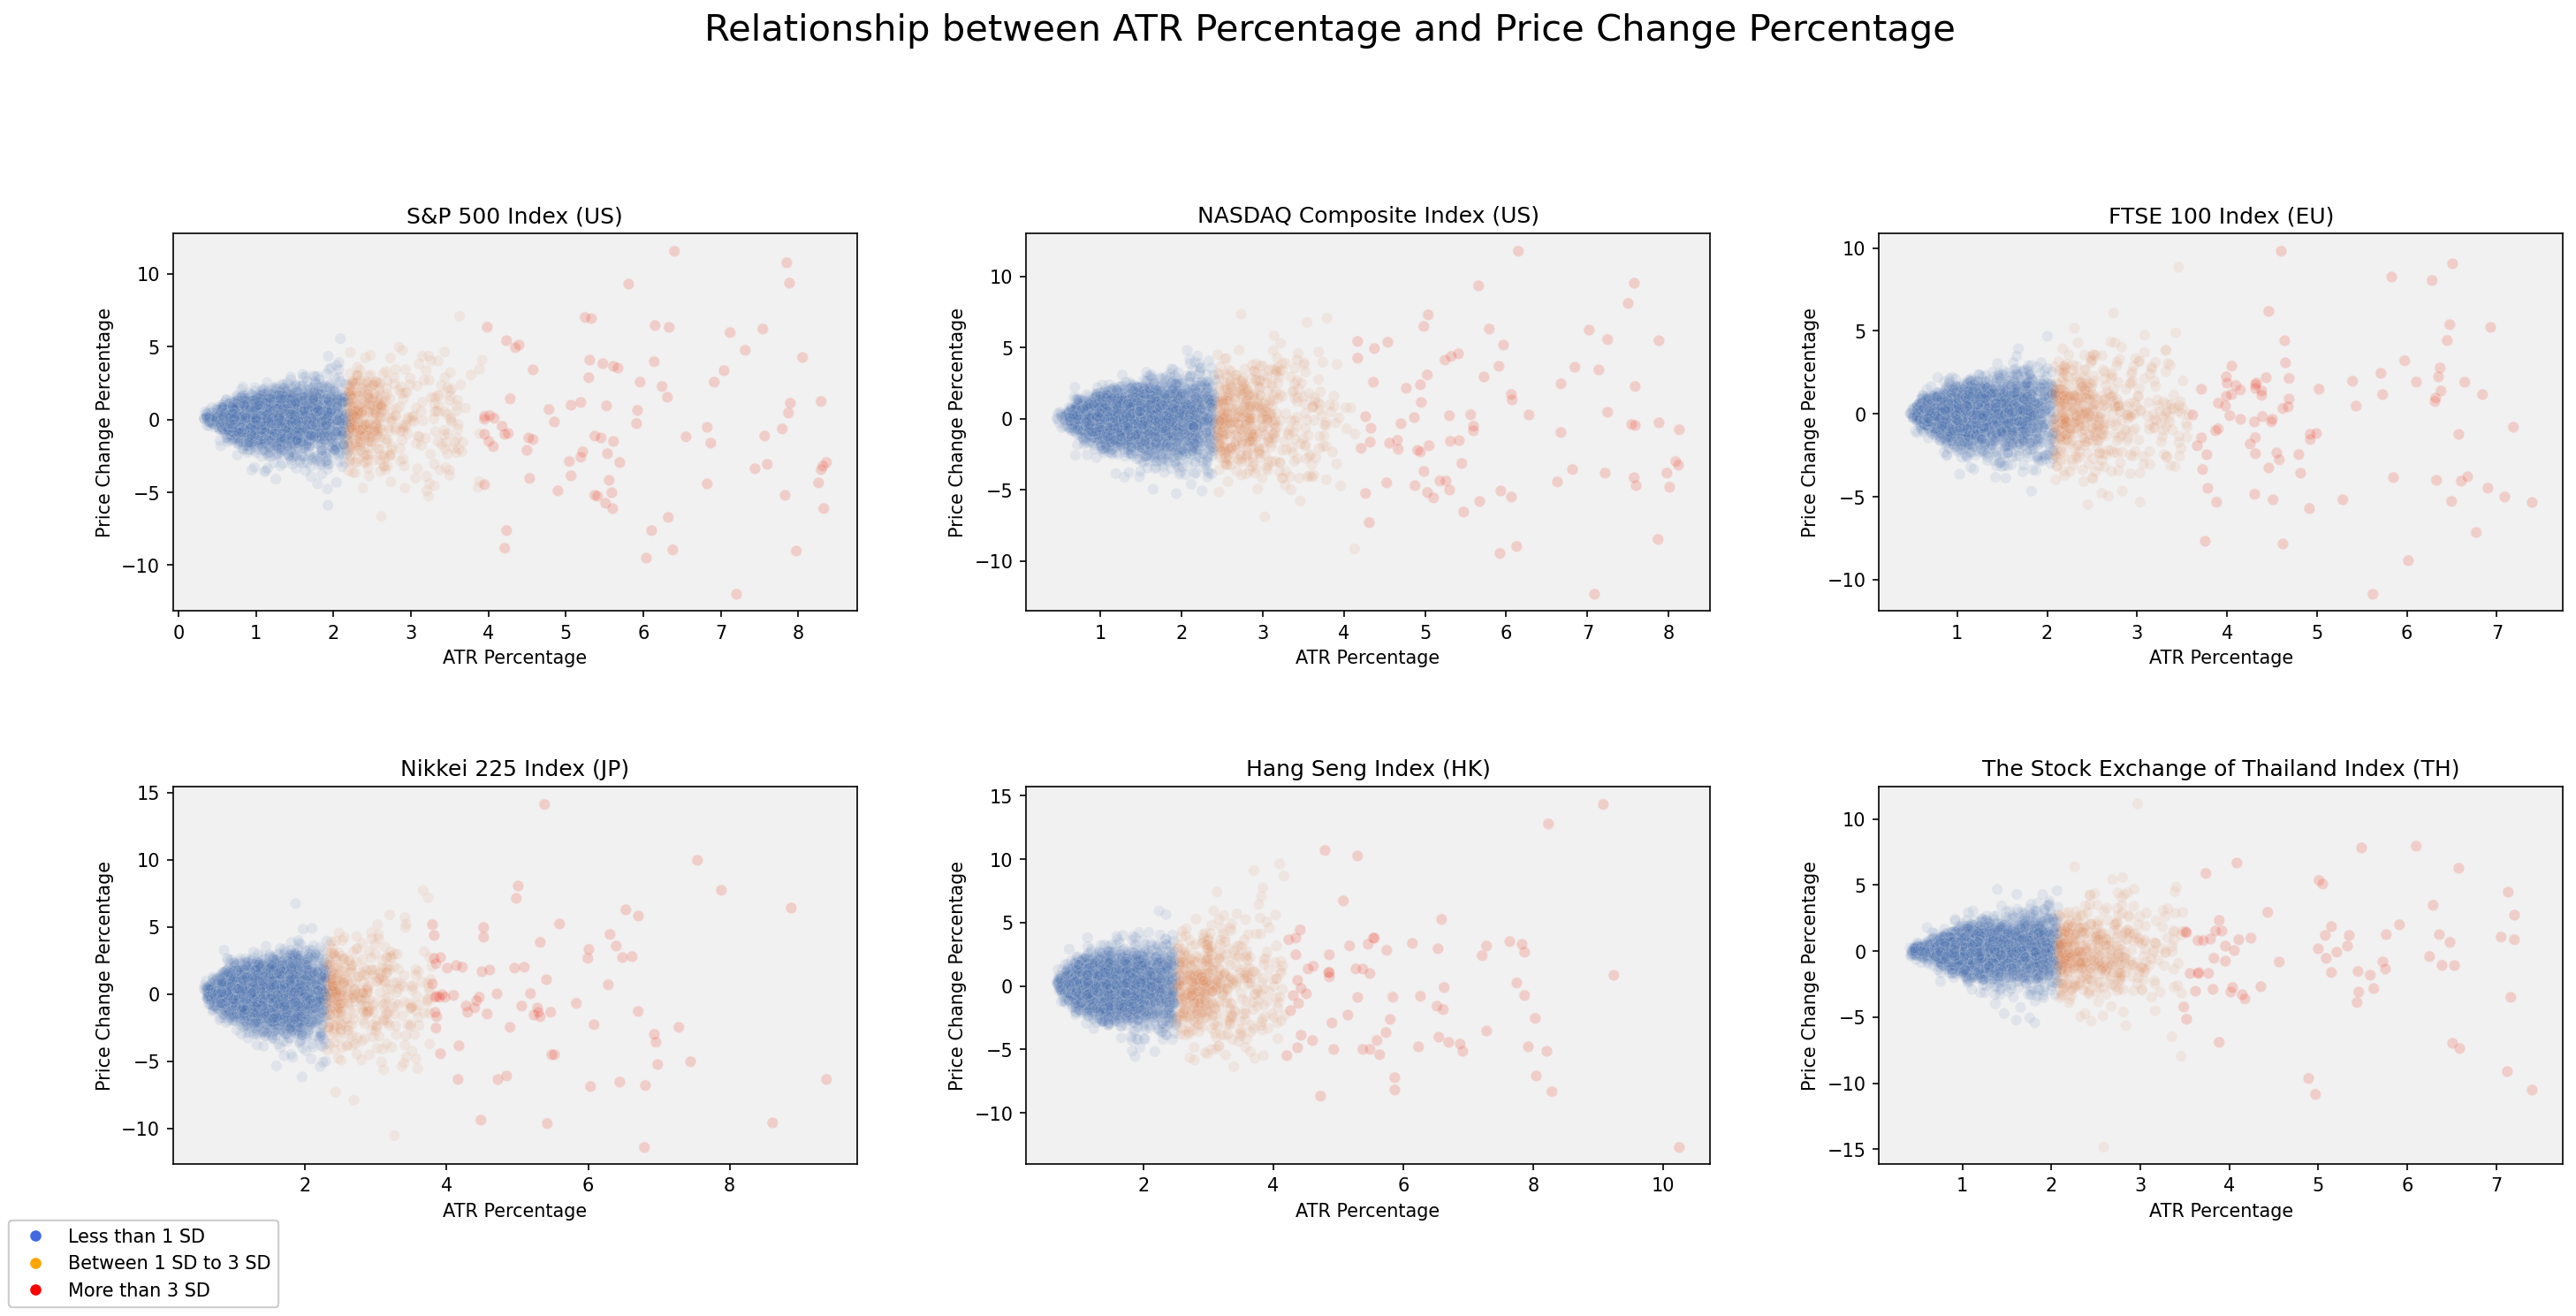

In [23]:
sns.set_palette("deep")

fig, axs = plt.subplots(2, 3, figsize=(20, 10), dpi=150)

legend_colors = ['lightblue', 'orange', 'red']

for i, ax in enumerate(axs.flatten()):
    mean_value = dataframes_index_list[i]['ATR_Percentage'].mean()
    std_value = dataframes_index_list[i]['ATR_Percentage'].std()

    dataframes_index_list[i]['More_1SD_Range'] = dataframes_index_list[i]['ATR_Percentage'] > (mean_value + std_value)
    dataframes_index_list[i]['More_3SD_Range'] = dataframes_index_list[i]['ATR_Percentage'] > (mean_value + 3 * std_value)

    sns.scatterplot(
        data=dataframes_index_list[i],
        x='ATR_Percentage',
        y='Price_Change_Percentage',
        hue='More_1SD_Range',
        color='royalblue',
        alpha=0.1,
        legend=False,
        ax=ax
    )

    sns.scatterplot(
        data=dataframes_index_list[i].loc[dataframes_index_list[i]['More_3SD_Range']],
        x='ATR_Percentage',
        y='Price_Change_Percentage',
        color='red',
        alpha=0.1,
        legend=False,
        ax=ax
    )

    ax.set_xlabel('ATR Percentage')

    ax.set_ylabel('Price Change Percentage')

    ax.set_title(index_list[i][1])

    custom_legend = [
        plt.Line2D([], [], marker='o', color='royalblue', linestyle='None', markersize=5),
        plt.Line2D([], [], marker='o', color='orange', linestyle='None', markersize=5),
        plt.Line2D([], [], marker='o', color='red', linestyle='None', markersize=5),
    ]

    fig.legend(custom_legend, ['Less than 1 SD', 'Between 1 SD to 3 SD','More than 3 SD'], loc='lower left')
    
    ax.patch.set_alpha(0.3)
    ax.set_facecolor('lightgray')

fig.suptitle('Relationship between ATR Percentage and Price Change Percentage', size=20)

fig.tight_layout(pad=5.0)

plt.show()